In [ ]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link = 'https://docs.google.com/spreadsheets/d/1Tma3lVYTy3ylD8kJ7JqIfgp1lDCGA25W/edit?usp=sharing&ouid=115537202715188995759&rtpof=true&sd=true'
 
import pandas as pd
 
# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('final_results.xlsx') 
 
df = pd.read_excel('final_results.xlsx')
print(df)


In [77]:
df_new = df[df['Pacman Agent'] == 'ExpectimaxAgent']
expectimax = df_new['Average Score'].tolist()
print(expectimax)
df_new = df[df['Pacman Agent'] == 'MinimaxAgent']
minimax = df_new['Average Score'].tolist()
print(minimax)
df_new = df[df['Pacman Agent'] == 'MCTSAgent']
mcts = df_new['Average Score'].tolist()
print(sum(mcts)/len(mcts))

[397.0, -342.0, -252.0, 1662.0, -44.0, -142.0, 799.0, 408.0, -449.0, -512.0, 1076.0, -422.0, 1126.0, 863.0, -792.0, -411.0, -528.0, 106.0, 1904.0, -475.0, -582.0, 231.0, 1549.0, -248.0, 218.0, -79.0, 4.0, -348.0, 984.0, -529.0, -412.0, -5.0, 201.0, 1410.0, 1050.0, 410.0, -281.0, 62.0, 537.0, -772.0, 910.0, 1306.0, 618.0, -358.0, -492.0, -382.0, 2655.0, -14.0, 209.0, 1099.0, -151.0, -51.0, 1678.0, 478.0, -2.0, 54.0, -202.0, 657.0, 2818.0, 1607.0, 303.0, -692.0, 825.0, -262.0, 614.0, 1515.0, -992.0, -186.0, 228.0, 1366.0, -190.0, -419.0, -772.0, -458.0, 1263.0, 360.0, 756.0, 1233.0, -142.0, -350.0, 22.0, 759.0, 188.0, -992.0, 500.0, -13.0, 502.0, -652.0, 383.0, 487.0, -106.0, -420.0, 854.0, 22.0, 1266.0, 424.0, 438.0, -72.0, 4.0, 1030.0, 821.0, -331.0, 368.0, 699.0, 195.0, 468.0, -648.0, 281.0, 1008.0, 495.0, 2292.0, 481.0, 107.0, -369.0, 1327.0, 347.0, 158.0, 831.0, -302.0, -162.0, 315.0, 442.0, -192.0, 1695.0, 328.0, -447.0, -1062.0, 547.0, 408.0, 38.0, 703.0, -326.0, -466.0, 298.0, 57

In [78]:
import scipy.stats as stats
threshold = 0.05
pval = []
stat,p = stats.ttest_ind(a=minimax, b=expectimax, equal_var=False)
print('p values for minimax and expectimax = ',p, p < threshold)
pval.append(p)
stat,p = stats.ttest_ind(a=mcts, b=expectimax, equal_var=False)
print('p values for mcts and expectimax = ',p, p < threshold)
pval.append(p)
stat,p = stats.ttest_ind(a=mcts, b=minimax, equal_var=False)
print('p values for mcts and minimax = ',p, p < threshold)
pval.append(p)

print(pval)

p values for minimax and expectimax =  0.0019250821640442862 True
p values for mcts and expectimax =  6.15065929115192e-27 True
p values for mcts and minimax =  2.2165875619380224e-42 True
[0.0019250821640442862, 6.15065929115192e-27, 2.2165875619380224e-42]


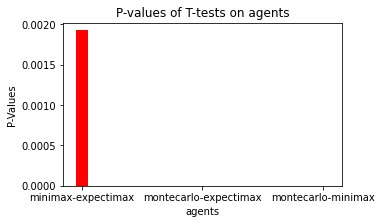

In [72]:
import matplotlib.pyplot as plt

agents = ['minimax-expectimax','montecarlo-expectimax','montecarlo-minimax']
fig = plt.figure(figsize = (5, 3))
plt.bar(agents, pval, color ='red',width = 0.1)
plt.xlabel("agents")
plt.ylabel("P-Values")
plt.title("P-values of T-tests on agents")
plt.show()

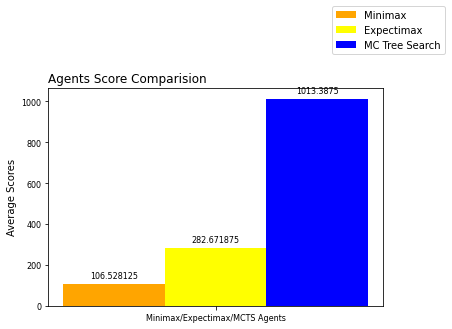

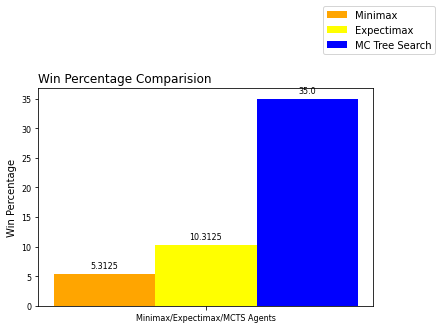

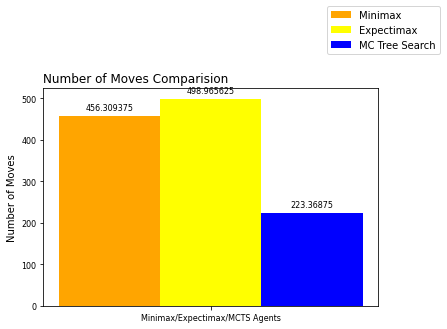

In [69]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def generatePlot(minmaxAvg,expectimaxAvg,mctsAvg,agentList,layoutList,ylabel,title):
  x = np.arange(len(agentList))  
  figure, plot = plt.subplots()

  plot.set_ylabel(ylabel)
  plot.set_title(title,loc="left")
  plot.set_xticks(x)
  plot.set_xticklabels(agentList)
  plot.tick_params(axis='both', which='major', labelsize=8)


  barWidth = 0.3
  barSet1 = plot.bar(x - barWidth, minmaxAvg, barWidth,label=layoutList[0], color='orange')
  barSet2 = plot.bar(x, expectimaxAvg, barWidth,label=layoutList[1], color='yellow')
  barSet3 = plot.bar(x + barWidth, mctsAvg,barWidth, label=layoutList[2], color='blue')

  def setPlot(results):
      for res in results:
          plot.annotate('{}'.format(res.get_height()),
                      xy=(res.get_x() + res.get_width() / 2, res.get_height()),
                      xytext=(0, 4), 
                      ha='center', va='bottom',
                      textcoords="offset points",
                      fontsize=8)

  setPlot(barSet1)
  setPlot(barSet2)
  setPlot(barSet3)

  plot.legend(bbox_to_anchor=(1.2, 1.4))
  plt.show()

## Score Comparision
df_new = df[df['Pacman Agent'] == 'ExpectimaxAgent']
expectimax = df_new['Average Score'].tolist()

df_new = df[df['Pacman Agent'] == 'MinimaxAgent']
minimax = df_new['Average Score'].tolist()

df_new = df[df['Pacman Agent'] == 'MCTSAgent']
mcts = df_new['Average Score'].tolist()

minmaxAvg = sum(minimax)/len(minimax)
expectimaxAvg = sum(expectimax)/len(expectimax)
mctsAvg = sum(mcts)/len(mcts)
agentList = ["Minimax/Expectimax/MCTS Agents"]
layoutList = ["Minimax","Expectimax","MC Tree Search"]
ylabel = 'Average Scores'
title = 'Agents Score Comparision'
generatePlot(minmaxAvg,expectimaxAvg,mctsAvg,agentList,layoutList,ylabel,title)


##Win rate comparision

df_new = df[df['Pacman Agent'] == 'ExpectimaxAgent']
expectimax = len(df_new['Win Rate'].tolist())
expectimaxWin = (df_new[df_new['Record']=='Win'])
expectMaxWinAvg = (len(expectimaxWin)/expectimax)*100

df_new = df[df['Pacman Agent'] == 'MinimaxAgent']
minimax = len(df_new['Win Rate'].tolist())
minimaxWin = (df_new[df_new['Record']=='Win'])
miniMaxWinAvg = (len(minimaxWin)/minimax)*100

df_new = df[df['Pacman Agent'] == 'MCTSAgent']
mcts = len(df_new['Win Rate'].tolist())
mctsWin = df_new['Win Rate'].tolist()
mctsWinAvg = sum(mctsWin)/len(mctsWin)*100

agentList = ["Minimax/Expectimax/MCTS Agents"]
layoutList = ["Minimax","Expectimax","MC Tree Search"]
ylabel ='Win Percentage'
title ='Win Percentage Comparision'
generatePlot(miniMaxWinAvg,expectMaxWinAvg,mctsWinAvg,agentList,layoutList,ylabel,title)

##Average steps comparision
df_new = df[df['Pacman Agent'] == 'ExpectimaxAgent']
expectimaxMoves = df_new['Average Number of Moves'].tolist()
expectimaxMovesAvg = sum(expectimaxMoves)/len(expectimaxMoves)

df_new = df[df['Pacman Agent'] == 'MinimaxAgent']
minimaxMoves = df_new['Average Number of Moves'].tolist()
minimaxMovesAvg = sum(minimaxMoves)/len(minimaxMoves)

df_new = df[df['Pacman Agent'] == 'MCTSAgent']
mctsMoves = df_new['Average Number of Moves'].tolist()
mctsMovesAvg = sum(mctsMoves)/len(mctsMoves)

agentList = ["Minimax/Expectimax/MCTS Agents"]
layoutList = ["Minimax","Expectimax","MC Tree Search"]
ylabel ='Number of Moves'
title ='Number of Moves Comparision'
generatePlot(minimaxMovesAvg,expectimaxMovesAvg,mctsMovesAvg,agentList,layoutList,ylabel,title)

